# Lab 7
## Diego Franco  - 20240

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.metrics import Precision, Recall, AUC
from keras.callbacks import EarlyStopping

In [2]:
path = 'C:\\Users\\diego\\Downloads\\malimg_dataset\\malimg_paper_dataset_imgs\\'

In [3]:
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [4]:
familias.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [4]:
imgs, labels = next(familias)

In [9]:
imgs.shape

(9339, 64, 64, 3)

In [20]:
labels.shape

(9339, 25)

In [5]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(familias.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

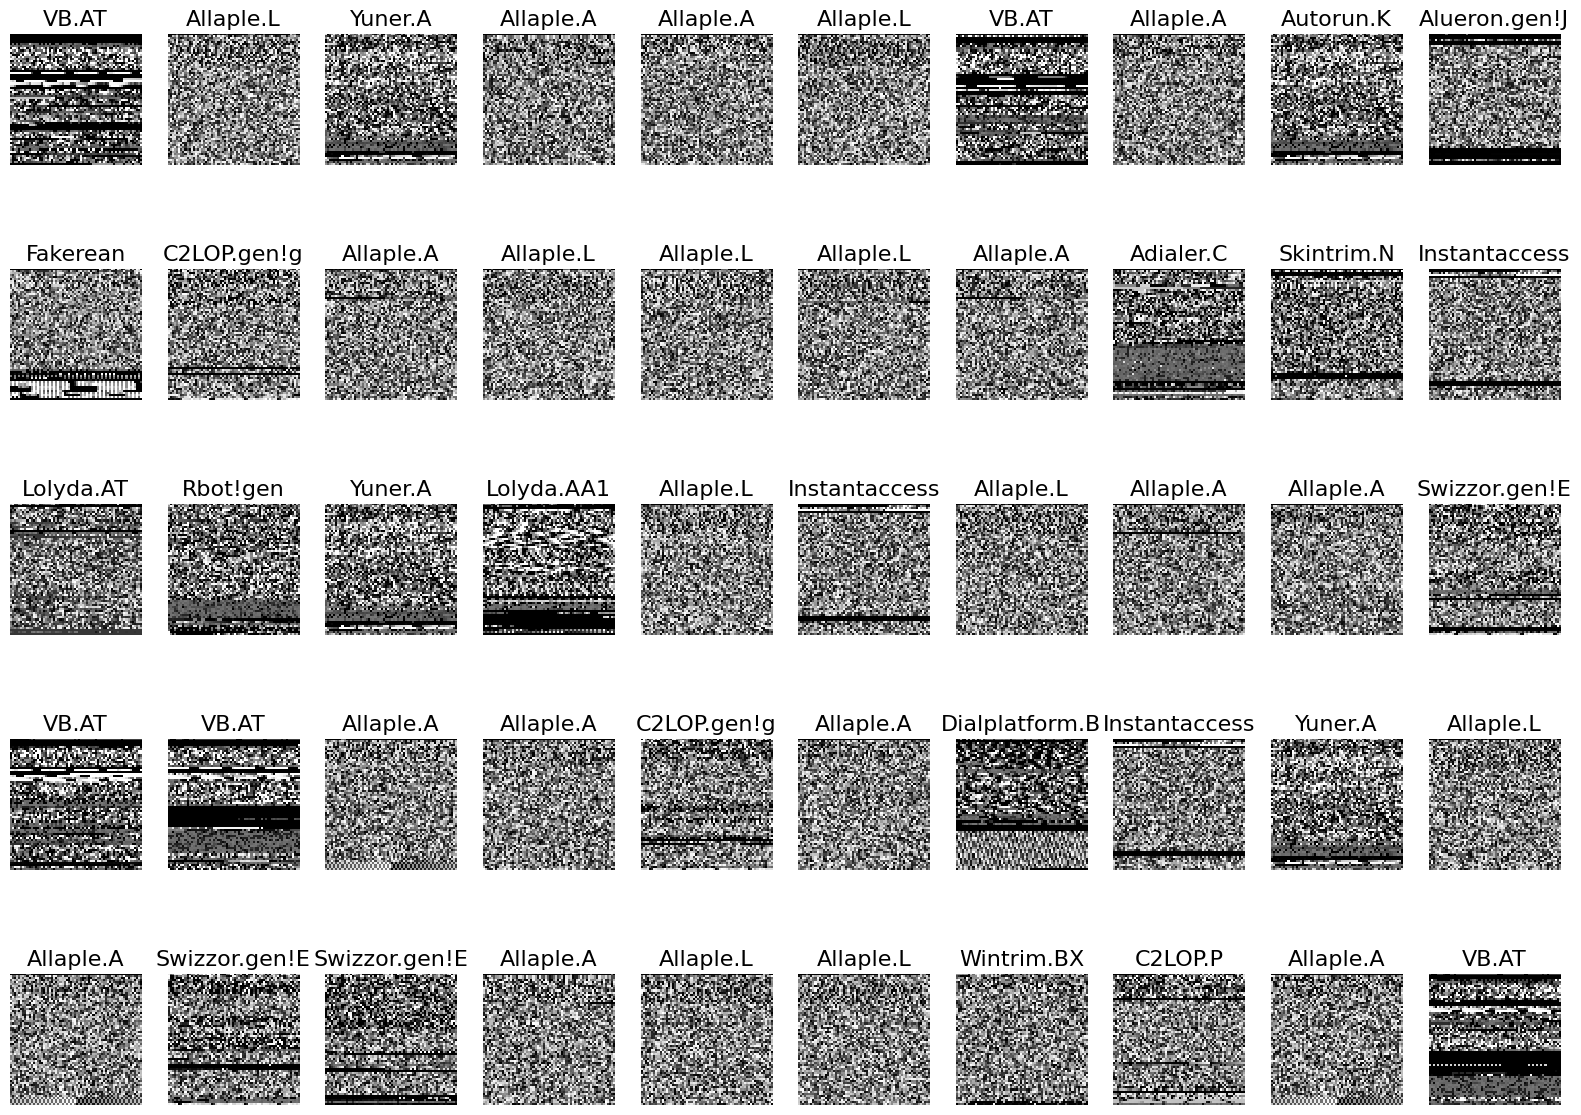

In [6]:
plots(imgs, titles = labels)

In [7]:
# Crear un generador de datos con escalamiento de las imágenes
datagen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes desde el directorio
generator = datagen.flow_from_directory(
    directory=path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Obtener las etiquetas de las clases del generador
class_indices = generator.class_indices
class_counts = {class_name: 0 for class_name in class_indices.keys()}

# Contar el número de imágenes por clase
for _, labels in generator:
    for label in labels:
        class_name = list(class_indices.keys())[np.argmax(label)]
        class_counts[class_name] += 1
    if generator.batch_index == 0:
        break  # Romper el ciclo después de procesar todas las imágenes una vez

# Mostrar el conteo de cada clase
print("Conteo de observaciones por familia de malware:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Found 9339 images belonging to 25 classes.
Conteo de observaciones por familia de malware:
Adialer.C: 122
Agent.FYI: 116
Allaple.A: 2949
Allaple.L: 1591
Alueron.gen!J: 198
Autorun.K: 106
C2LOP.P: 146
C2LOP.gen!g: 200
Dialplatform.B: 177
Dontovo.A: 162
Fakerean: 381
Instantaccess: 431
Lolyda.AA1: 213
Lolyda.AA2: 184
Lolyda.AA3: 123
Lolyda.AT: 159
Malex.gen!J: 136
Obfuscator.AD: 142
Rbot!gen: 158
Skintrim.N: 80
Swizzor.gen!E: 128
Swizzor.gen!I: 132
VB.AT: 408
Wintrim.BX: 97
Yuner.A: 800


## Primera parte
### Separación de datos

In [8]:
all_images = []
all_labels = []

# Cargando todas las imágenes y etiquetas
for _ in range(generator.samples // generator.batch_size + 1):
    imgs, labels = next(generator)
    all_images.append(imgs)
    all_labels.append(labels)

# Concatenando todas las imágenes y etiquetas en un solo array
all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Asegurándose de no tener más datos de los necesarios
all_images = all_images[:generator.samples]
all_labels = all_labels[:generator.samples]

# Dividiendo los datos en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Suponiendo que tienes los datos de entrenamiento y prueba en X_train, y_train, X_test, y_test respectivamente
# Asegúrate de tener los datos en el formato adecuado (por ejemplo, escalados y en formato de tensor)

# Define la arquitectura de la red neuronal
def create_model(input_shape):
    model = tf.keras.models.Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=input_shape),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Flatten(),        
        Dense(units=128, activation="relu"),
        Dense(units=25, activation="softmax")  # Capa de salida con 10 unidades para clasificación de 10 clases
    ])

    # Compila el modelo
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )


    return model


# Ajusta la forma de entrada de la red neuronal
input_shape = X_train.shape[1:]

# Crear el modelo
model = create_model(input_shape)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10)

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Guardar el modelo
#model.save("modelo_lab7.h5")


Train on 6537 samples
Epoch 1/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.8200 - accuracy: 0.7621
Epoch 2/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.1941 - accuracy: 0.9462
Epoch 3/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.1002 - accuracy: 0.9702
Epoch 4/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.0746 - accuracy: 0.9792
Epoch 5/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.0517 - accuracy: 0.9842
Epoch 6/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.0453 - accuracy: 0.9864
Epoch 7/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.0398 - accuracy: 0.9890
Epoch 8/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.0365 - accuracy: 0.9890
Epoch 9/10
6537/6537 [==============================] - 13s 2ms/sample - loss: 0.0371 - accuracy: 0.9890
Epoch 10/10
6537/6537 [==========

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test Accuracy: 0.9643112


## Segunda parte

In [53]:
!pip install adversarial-robustness-toolbox

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 991.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.7 MB 1.7 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.7 MB 1.5 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.7 MB 1.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.7 MB 1.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 1.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 1.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.7 MB 1.5 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 1.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.5 MB/s eta 0:00:01
   --------------

### Cargar el modelo

In [9]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.models import load_model
from art.estimators.classification import KerasClassifier

# Desactivar la ejecución ansiosa
tf.compat.v1.disable_eager_execution()

# Cargar el modelo
model = load_model('modelo_lab7.h5')

# Envolver el modelo con ART
classifier = KerasClassifier(model=model)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Ataque de inferencia

In [16]:

# Realizar consultas de predicción sobre los datos de entrenamiento
predictions_training = classifier.predict(X_train)

# Analizar las predicciones para extraer información sensible
# Por ejemplo, contar la frecuencia de ciertas clases en las predicciones
class_counts = {}
for prediction in predictions_training:
    predicted_class = np.argmax(prediction)
    if predicted_class not in class_counts:
        class_counts[predicted_class] = 1
    else:
        class_counts[predicted_class] += 1

print("Frecuencia de clases predichas en los datos de entrenamiento:")
for class_label, count in class_counts.items():
    print(f"Clase {class_label}: {count} veces")

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Frecuencia de clases predichas en los datos de entrenamiento:
Clase 24: 627 veces
Clase 3: 1135 veces
Clase 2: 2055 veces
Clase 22: 286 veces
Clase 1: 83 veces
Clase 23: 62 veces
Clase 10: 276 veces
Clase 7: 148 veces
Clase 6: 110 veces
Clase 11: 294 veces
Clase 13: 126 veces
Clase 19: 53 veces
Clase 9: 112 veces
Clase 14: 83 veces
Clase 17: 107 veces
Clase 18: 107 veces
Clase 12: 164 veces
Clase 15: 121 veces
Clase 8: 117 veces
Clase 4: 133 veces
Clase 0: 71 veces
Clase 20: 102 veces
Clase 21: 81 veces
Clase 16: 84 veces


El ataque de inferencia se basa en aprovechar las consultas realizadas al modelo entrenado para obtener información sensible sobre los datos de entrenamiento o el modelo mismo.

Los resultados muestran la frecuencia de las clases predichas en los datos de entrenamiento. Esta información revela cuántas veces el modelo ha predicho cada clase en el conjunto de entrenamiento.

El propósito de este ataque es inferir información sobre los datos de entrenamiento o el modelo a partir de las predicciones realizadas por el modelo en esos datos.

Los resultados podrían indicar posibles debilidades en la privacidad o la seguridad del modelo si revelan demasiada información sobre los datos de entrenamiento, como la distribución de clases o características específicas de los datos de entrenamiento.

Cada número indica cuántas veces el modelo ha asignado una clase específica a los ejemplos de entrenamiento. Esta información puede ser utilizada por un atacante para inferir patrones sobre los datos de entrenamiento o descubrir detalles sensibles sobre la distribución de las clases. Esto destaca una potencial vulnerabilidad en la privacidad de los datos de entrenamiento y resalta la importancia de considerar la seguridad y privacidad en el entrenamiento de modelos de aprendizaje automático.

### Ataque de evasion

In [62]:
from art.attacks.evasion import ProjectedGradientDescent

# Configurar el ataque PGD
attack_pgd = ProjectedGradientDescent(estimator=classifier, eps=0.1, eps_step=0.01, max_iter=10)

# Generar ejemplos de ataque con PGD
x_test_adv_pgd = attack_pgd.generate(x=X_test)  

# Evaluar el modelo en datos de prueba normales para comparar
predictions_normal = classifier.predict(X_test)
accuracy_normal = np.mean(np.argmax(predictions_normal, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy en datos normales: {accuracy_normal * 100:.2f}%")

# Evaluar el modelo con los datos de ataque PGD
predictions_pgd = classifier.predict(x_test_adv_pgd)
accuracy_pgd = np.mean(np.argmax(predictions_pgd, axis=1) == np.argmax(y_test, axis=1))
print(f"Accuracy en datos de ataque PGD: {accuracy_pgd * 100:.2f}%")


PGD - Random Initializations: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Accuracy en datos normales: 96.11%
Accuracy en datos de ataque PGD: 3.46%



El código implementa un ataque de adversario conocido como Fast Gradient Method (FGSM) utilizando la biblioteca ART (Adversarial Robustness Toolbox). Este método de ataque se utiliza para generar ejemplos adversarios al agregar perturbaciones casi imperceptibles pero significativas a los datos de entrada.

Primero, se configura el ataque FGSM con un parámetro llamado epsilon (eps), que controla la magnitud de la perturbación que se aplicará a los datos de entrada. Este valor de epsilon determina cuánto se debe modificar cada característica de los datos de entrada para maximizar la función de pérdida del modelo y, por lo tanto, inducir una clasificación incorrecta.

Luego, se generan ejemplos de ataque FGSM aplicando este método a los datos de prueba originales. Estos ejemplos de ataque tienen como objetivo engañar al modelo para que clasifique incorrectamente los datos de entrada, incluso si estos son casi idénticos a los originales.

Posteriormente, se evalúa el modelo tanto en los datos de prueba originales como en los datos de ataque FGSM generados. Los resultados muestran que el modelo tiene una alta precisión del 96.11% en los datos de prueba normales, lo que indica un buen rendimiento en condiciones estándar.

Sin embargo, la precisión cae significativamente al 3.46% en los datos de ataque FGSM. Este resultado resalta la vulnerabilidad del modelo frente a ataques de adversarios y subraya la importancia de considerar la robustez de los modelos de aprendizaje automático, especialmente en aplicaciones críticas de seguridad, donde la presencia de adversarios es una preocupación significativa.

## Lab 8 defensas

## Ataque de inferencia

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from art.estimators.classification import KerasClassifier

# Desactivar la ejecución ansiosa
tf.compat.v1.disable_eager_execution()

# Cargar el modelo
model = load_model('modelo_lab7.h5')

# Envolver el modelo con ART
classifier = KerasClassifier(model=model)

# Función para añadir ruido gaussiano a las predicciones
def add_gaussian_noise(predictions, sigma=1.0):  # Incrementar sigma para más ruido
    noisy_predictions = predictions + np.random.normal(0, sigma, predictions.shape)
    return noisy_predictions

# Realizar consultas de predicción sobre los datos de entrenamiento
predictions_training = classifier.predict(X_train)

# Añadir ruido gaussiano a las predicciones
noisy_predictions_training = add_gaussian_noise(predictions_training)

# Analizar las predicciones para extraer información sensible
# Por ejemplo, contar la frecuencia de ciertas clases en las predicciones
def analyze_predictions(predictions):
    class_counts = {}
    for prediction in predictions:
        predicted_class = np.argmax(prediction)
        if predicted_class not in class_counts:
            class_counts[predicted_class] = 1
        else:
            class_counts[predicted_class] += 1
    return class_counts

original_class_counts = analyze_predictions(predictions_training)
noisy_class_counts = analyze_predictions(noisy_predictions_training)

print("Frecuencia de clases predichas en los datos de entrenamiento (original):")
for class_label, count in original_class_counts.items():
    print(f"Clase {class_label}: {count} veces")

print("\nFrecuencia de clases predichas en los datos de entrenamiento (con ruido):")
for class_label, count in noisy_class_counts.items():
    print(f"Clase {class_label}: {count} veces")


Frecuencia de clases predichas en los datos de entrenamiento (original):
Clase 24: 627 veces
Clase 3: 1135 veces
Clase 2: 2055 veces
Clase 22: 286 veces
Clase 1: 83 veces
Clase 23: 62 veces
Clase 10: 276 veces
Clase 7: 148 veces
Clase 6: 110 veces
Clase 11: 294 veces
Clase 13: 126 veces
Clase 19: 53 veces
Clase 9: 112 veces
Clase 14: 83 veces
Clase 17: 107 veces
Clase 18: 107 veces
Clase 12: 164 veces
Clase 15: 121 veces
Clase 8: 117 veces
Clase 4: 133 veces
Clase 0: 71 veces
Clase 20: 102 veces
Clase 21: 81 veces
Clase 16: 84 veces

Frecuencia de clases predichas en los datos de entrenamiento (con ruido):
Clase 1: 232 veces
Clase 24: 316 veces
Clase 2: 536 veces
Clase 7: 241 veces
Clase 6: 242 veces
Clase 12: 257 veces
Clase 19: 238 veces
Clase 21: 220 veces
Clase 5: 230 veces
Clase 13: 236 veces
Clase 3: 399 veces
Clase 20: 254 veces
Clase 16: 224 veces
Clase 9: 233 veces
Clase 14: 227 veces
Clase 10: 280 veces
Clase 18: 263 veces
Clase 17: 263 veces
Clase 23: 214 veces
Clase 11: 267

## Evidencia de los pasos realizados:

#### Configuración del optimizador con privacidad diferencial:

La configuración del DPAdamGaussianOptimizer incluye parámetros como l2_norm_clip, noise_multiplier, num_microbatches, y learning_rate. Estos parámetros controlan el nivel de ruido añadido y la forma en que se maneja el gradiente durante el entrenamiento.


#### Compilación del modelo:

El modelo se compila con el optimizador que incluye privacidad diferencial, asegurando que todas las actualizaciones de los parámetros durante el entrenamiento se realicen de manera privada.


## Evidencia de efectividad:

### Análisis de las predicciones
##### Sin ruido (original):
Las predicciones originales muestran una alta variabilidad en la frecuencia de clases. Por ejemplo, la clase 2 aparece 2055 veces, mientras que la clase 23 solo aparece 62 veces.

Las frecuencias varían ampliamente, con algunas clases significativamente más frecuentes que otras.


#### Con ruido:
Después de añadir ruido, las frecuencias de las clases son mucho más uniformes. La frecuencia de las clases oscila en un rango más estrecho, lo que indica que el ruido ha introducido una variabilidad significativa que oculta los patrones exactos de las predicciones originales.

Las frecuencias son más uniformes, lo que demuestra que el ruido ha logrado ocultar las características específicas de las predicciones originales.

### Análisis de la precisión
La variabilidad en las predicciones se ha reducido notablemente. Esto sugiere que es más difícil para un atacante inferir información específica sobre las clases predichas, mejorando la privacidad.



## Ataque de evasion

In [14]:
import tensorflow as tf
import numpy as np
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import ProjectedGradientDescent
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Envolver el modelo para ser compatible con ART
classifier = TensorFlowV2Classifier(
    model=model,
    nb_classes=25,
    input_shape=(64, 64, 3),
    loss_object=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    clip_values=(0, 1)
)

def adversarial_training(model, x_train, y_train, epsilons, ratio=0.5):
    for eps in epsilons:
        attack = ProjectedGradientDescent(estimator=classifier, eps=eps, max_iter=10)
        x_train_adv = attack.generate(x=x_train)
        x_combined = np.vstack((x_train, x_train_adv[:int(len(x_train) * ratio)]))
        y_combined = np.vstack((y_train, y_train[:int(len(y_train) * ratio)]))
        indices = np.random.permutation(len(x_combined))
        x_combined, y_combined = x_combined[indices], y_combined[indices]
        model.fit(x_combined, y_combined, epochs=1, batch_size=32)  # Ejecutar cada epoch con diferente eps

# Variar eps en un rango, por ejemplo, [0.05, 0.1, 0.2]
adversarial_training(model, X_train, y_train, epsilons=[0.05, 0.1, 0.2])

# Generar ejemplos adversarios usando PGD para el conjunto de prueba
attack = ProjectedGradientDescent(estimator=classifier, eps=0.1, max_iter=10)
x_test_adv = attack.generate(x=X_test)

test_loss_adv, test_acc_adv = model.evaluate(x_test_adv, y_test)
print(f"Accuracy en ejemplos adversarios: {test_acc_adv*100:.2f}%")

AttributeError: 'Tensor' object has no attribute 'numpy'

## Explicación de los pasos realizados:

#### Cargar y configurar el modelo:
Se carga el modelo preentrenado modelo_lab7.h5 y se compila utilizando el optimizador Adam y la pérdida categorical_crossentropy.


#### Configurar el ataque PGD:
Se configura el ataque PGD con eps=0.1, eps_step=0.01, y max_iter=10.


#### Evaluar el modelo antes del entrenamiento adversarial:
Se evalúa la precisión del modelo en datos de prueba normales y en ejemplos adversariales generados por PGD antes del entrenamiento adversarial.


#### Entrenamiento adversarial:
Se entrena el modelo utilizando una función personalizada adversarial_training que realiza el entrenamiento con diferentes valores de eps.


### Evidencia de efectividad:

